<a href="https://colab.research.google.com/github/johnsigma/meuPortifolio/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---
  

# Analisando a Violência no Rio de Janeiro

O Rio de Janeiro é uma das cidades que mais [recebem turistas do Brasil](https://blog.geofusion.com.br/turismo-no-brasil-quais-os-destinos-mais-visitados) e esse número tende a [aumentar cerca de 31%](https://g1.globo.com/rj/rio-de-janeiro/carnaval/2020/noticia/2020/03/02/rio-registrou-aumento-de-31percent-no-numero-de-turistas-durante-o-carnaval.ghtml) durante a época do Carnaval. Mas uma preocupação que todos devemos ter, não apenas sobre o Rio de Janeiro mas sobre qualquer local que vamos visitar, é sabermos os dados da violência naquele local. Então se você planeja viajar para lá, seja na época do Carnaval ou não, se liga nesse artigo onde analiso alguns dados do estado.

A violência é um mal que assola todo o país, [apesar da diminuição no número de homicídios](https://bit.ly/3e0I5UU), o Brasil continua sendo um dos países [mais violentos do mundo](https://bit.ly/2MOGDJh) e o Rio de Janeiro um dos estados [mais violentos do Brasil](https://exame.com/brasil/os-estados-mais-violentos-do-brasil-3/).

Neste artigo busco analisar a violência no estado do Rio de Janeiro e trazer algumas obersvações estatísticas e visuais para quem está interessado em viajar para lá ou apenas curioso sobre a violência do Rio. Para isso irei utilizar a linguagem de programação Python e a biblioteca Pandas, feita especialmente para lidar com análise de dados.

Essa análise tem objetivo acadêmico e faz parte do segundo projeto do curso Data Science na Prática do professor Carlos Melo.

![alt text](https://github.com/johnsigma/meuPortifolio/blob/master/imagens/foto_rio.jpeg?raw=true)

## Obtenção dos Dados


Os dados foram retirados do ISP - ***Instituto de Segurança Pública do Rio de Janeiro***. Eles refletem as estatísticas de segurança por série histórica mensal no estado e contempla dados desde 01/1991 até 08/2019.

Neste [link](http://www.ispdados.rj.gov.br/estatistica.html) você encontra a fonte destes dados e outros relacionados a segurança pública no estado do Rio de Janeiro. Neste outro [link](http://www.ispvisualizacao.rj.gov.br/index.html) há um *dashboard* interativo e visual onde se pode filtrar os dados sobre crimes do estado.

Importante ressaltar que o *dataset* utilizado aqui foi pré-processado para focar em alguns ponto específicos da análise. Neste [link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv) se encontra o mesmo *dataset* utilizado para fazer as análises.
Clique [aqui](http://www.ispdados.rj.gov.br/Arquivos/DOMensalEstadoDesde1991.csv) para baixar os dados brutos não previamente processados.

In [0]:
# importar o pandas
import pandas as pd

In [0]:
# importar o arquivo csv
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv', index_col='vano')

## Análise Inicial dos Dados

Nesta etapa vamos fazer uma análise inicial sobre os dados afim de conhecermos melhor nosso *dataset*, verificando o tamanho, as colunas, os tipos das variáveis e a porcentagem de valores ausentes.

Conforme vamos analisando darei uma explicação para as variáveis analisadas. Para verificar o significado de todas as variáveis do *dataset* entre no link: [http://www.ispdados.rj.gov.br/Notas.html](http://www.ispdados.rj.gov.br/Notas.html) e baixe o primeiro arquivo `xls`.


### Tamanho do *dataset*

Agora vamos verificar qual o tamanho do nosso conjunto de dados utilizando a chamada de atributo `.shape` que vai nos retornar o número de entradas (linhas) e variáveis (colunas).

In [0]:
df.shape

(344, 55)

Verificamos que nosso conjunto de dados têm 344 entradas e 55 colunas (Inicialmente teríamos 56 colunas, mas eu fixei a variável `vano` como id do *dataset* para melhorar a visualização do gráfico de linhas posteriormente).

### Colunas

Vamos utilizar `.columns` para verificar os nomes das nossas colunas (variáveis).

In [0]:
df.columns

Index(['mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'indicador_l

### Tipos das variáveis

Para melhor trabalharmos com os dados do *dataset* temos que saber com quais tipos de dados estamos trabalhando (int, float, String, etc).

In [0]:
df.dtypes

mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transeunte                int64
furto_coleti

### Verificando a cara do *dataset*

Vamos agora utilizar o método `.head()` para visualizarmos as 5 primieras entradas do nosso conjunto de dados, isso é importante para analisarmos qual a *cara* do nosso *dataset*.

In [0]:
df.head()

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


### Valores ausentes

Agora que sabemos como nosso *dataset* se parece temos que verificar qual a procentagem de valores ausentes das colunas para determinar a qualidade do nosso *dataset*, quanto menos valores ausentes mais qualidade tem nosso dataset. Isso é importante para sabermos como lidar com essas variáveis, é importante verificar se esses valores nulos são significativos comparados ao número de entradas.


In [0]:
((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending=False)

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
trafico_drogas                52.325581
cmba                          52.325581
cmp                           52.325581
aaapai                        52.325581
apf                           52.325581
furto_coletivo                41.860465
estupro                       41.860465
extorsao                      41.860465
sequestro_relampago           41.860465
estelionato                   41.860465
roubo_apos_saque              41.860465
furto_celular                 41.860465
pol_militares_mortos_serv     41.860465
pol_civis_mortos_serv         41.860465
roubo_cx_eletronico           41.860465
roubo_conducao_saque          41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
ameaca                        27.906977
sequestro                     27.906977


Percebemos que há bastante valores ausentes. Isso pode acontecer por vários motivos.

Percebemos também que várias colunas têm a mesma porcentagem de dados ausentes. Como esse *dataset* contempla dados desde 1991, pode significar que várias dessas colunas começaram a serem preenchidas após esse período, e que os valores para os dados antes desta data de preenchimento são ausentes. 

## Informações Estatísticas da Violência no Rio de Janeiro

Com o Pandas é possível apresentar informações estatísticas sobre o conjunto de dados. Vamos agora ver algumas dessas informações, como a média para determinada coluna, valores máximos e mínimos, etc.


### Resumo estatístico do *dataset*

Com o método `.describe()` podemos ver um resumo estatístico do nosso conjunto de dados.

* `count` - número de valores não culos da coluna
* `mean` - média dos valores da coluna
* `std` - desvio padrão da coluna
* `min` - valor mínimo da coluna
* `25%` - percentil de 25% (25% dos valores estão abaixo do valor retornado)
* `50%` - percentil de 50% ou mediana
* `75%` - percentil de 75% (75% dos valores estão abaixo do valor retornado)
* `max` - valor máximo da coluna

In [0]:
df.describe()

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000,285.500000,2788.500000,592.000000,4.500000,3.000000,717.500000,10.000000

### Medias de algumas variáveis

Por mais que o método `.describe()` já nos fornece essa informação, como temos muitas colunas pode ser mais interessante calcular a média de colunas específicas diretamente. Para isso vamos utilizar o método `.mean()` que retorna a média da coluna especificada.

Vamos calcular a média das colunas `roubo_veiculo`, `furto_veiculos`, `recuperacao_veiculos` e `total_roubos`.

**Dicionário de variáveis:**

* `roubo_veiculo` - casos de roubos de veículos
* `furto_veiculos` - casos de furtos de veículos
* `recuperacao_veiculos` - casos de recuperação de veículos
* `total_roubos` - soma de todos os roubos listados no *dataset*

In [0]:
# média de roubo de veículos
print(df.roubo_veiculo.mean())

2448.6976744186045


In [0]:
# média de furto de veículos
df.furto_veiculos.mean()

1674.671511627907

In [0]:
# média de recuperação de veículos
df.recuperacao_veiculos.mean()

1772.2383720930231

In [6]:
# média de total de roubos
df.total_roubos.mean()

9428.119186046511

* O Rio tem em média 2449 casos de veículos roubados por mês (documentados)
* O Rio tem em média 1675 casos de veículos furtados por mês (documentados)
* O Rio tem em média 1773 casos de veículos recuperados por mês (documentados)
* O Rio tem em média 9429 casos de roubos (todos os tipos listados) por mês

### Porcentagem de carros recuperados

Agora que sabemos a média de carros roubados, furtados e recuperados vamos calcular a porcentagem de carros recuperados em relação ao número de carros roubados + carros furtados.

Iremos utilizar uma fórmula matemática simples, pegaremos a média de veículos recuperados e dividiremos pela soma de veículos roubados e furtados.

In [0]:
# porcentagem utilizando a média
df.recuperacao_veiculos.mean() / (df.roubo_veiculo.mean() + df.furto_veiculos.mean()) * 100

42.980346705075085

Verificamos que aproximadamente 43% dos veículos roubados ou furtados são recuperados por mês.

### Encontrando os valores máximos e mínimos de uma determinada variável.

Podemos também, como fizemos com a média, verificar qual o valor máximo e mínimo de uma variável escolhida utilizando os métodos `.max()` e `.min()`. Vamos fazer isso para a variável `hom_doloso`, que representa a quantidade de vítimas de homicídios dolosos, e `roubo_celular`, que representa a quantidade de casos de roubos de telefones celulares.

In [0]:
# valor máximo de hom_doloso
print(f'O maior número de homicídios dolosos em um mês no Rio de Janeiro é: {df.hom_doloso.max()}')

O maior número de homicídios dolosos em um mês no Rio de Janeiro é: 831


In [0]:
# valor mínimo de hom_doloso
print(f'O menor número de homicídios dolosos em um mês no Rio de Janeiro é: {df.hom_doloso.min()}')

O menor número de homicídios dolosos em um mês no Rio de Janeiro é: 272


In [7]:
# valor máximo de roubo_celular
print(f'O maior número de celulares roubados registrados em um mês foi de: {df.roubo_celular.max()}')

O maior número de celulares roubados registrados em um mês foi de: 2626.0


In [0]:
# valor mínimo de roubo_celular
print(f'O menor número de celulares roubados registrados em um mês foi de: {df.roubo_celular.min()}')

Importante ressaltar que podemos verificar esses valores máximos e mínimos para quaisquer variáveis quantitativas do nosso conjunto de dados.

## Visualização de Dados

Nada melhor para compreender análises do que utilizar gráficos, os gráficos são uma representação visual de dados e faz com que nosso cérebro entenda melhor as informações.

A seguir vamos plotar dois gráficos, um histograma para a variável `hom_doloso` e um gráfico de linhas para a varável `roubo_em_coletivo`.

**Dicionário de variáveis:**

* `hom_doloso`: quantidade de vítimas de homicídios dolosos
* `roubo_em_coletivo`: casos de roubo em coletivos



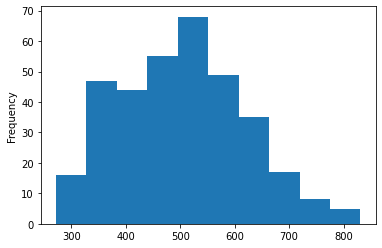

In [0]:
# hitograma para hom_doloso
df.hom_doloso.plot.hist();

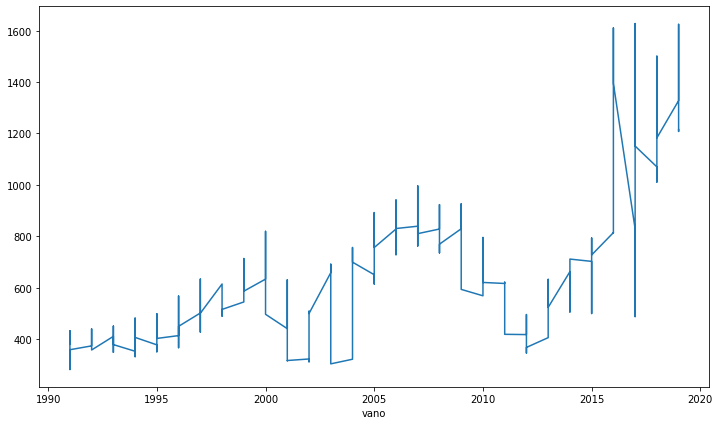

In [11]:
# gráfico de linhas para roubo_em_coletivo
df.roubo_em_coletivo.plot.line(figsize=(12,7));

O histograma nos diz qual a frequência de homicídios dolosos, podemos ver que o número de homicídio dolosos mais frequente é entre 500 e 550. Podemos verificar isso tirando a média e mediana da variável de homicídio dolosos utilizando os métodos `.mean()` e `.median()`.

In [0]:
df.hom_doloso.mean()

504.55523255813955

In [0]:
df.hom_doloso.median()

507.0

E percebemos que a média de homicídios dolosos no mês é de 504, que está no intervalo da frequência. Assim como sua mediana que nos diz que 50% dos valores estão abaixo de 507, que também está no intervalo de frequência.

O gráfico de linhas nos dá uma visualização de como está a distribuição para a variável `roubo_em_coletivo` através dos anos sobre o período de 01/1991 até 08/2019.

## Conclusão

Chega ao fim esta análise de dados sobre a violência no estado do Rio de Janeiro, quis mostrar nesta análise o que podemos fazer com o Pandas em termos de análise estatística e visualizações de gráficos. 

Fica meu adendo que o *dataset* utilizado possui muitas outras variáveis que não foram utilizadas nesta análise, mas é interessante ver os resultados que obtivemos mesmo trabalhando com um número limitado de variáveis e o que nós descobrimos com elas. Como a média de carros roubados, furtados e recuperados por mês, a porcentagem de carros recuperados por mês em relação ao número de carros furtados e roubados, uma descrição sobre informações estatísticas do *dataset* e as visualizações gráficas e como podemos verificar se são verdadeiras (no caso do histograma) e a distribuição do número de roubos em coletivos desde o perídodo inicial do *dataset* até o final e como foi evoluindo (e **aumentando**) conforme os anos foram passando.

No mais agradeço a quem leu até aqui e me despeço deixando os links do meu perfil no LinkedIn e do meu portifólio do GitHub para quem quiser me acompanhar em outros projetos de análise de dados e Data Science.

[LinkedIn](https://bit.ly/3cPOvEF)

[GitHub](https://github.com/johnsigma/meuPortifolio)